با سلام 
من هرچه قدر سعی کردم نتونستم که پلات از مدل رگرسیونم بکشم و نمونه ای که در زیر اومده ایجاد میشد ممنون میشم در این مورد بهم توضیح بدید

Project Multi Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv('1632300362534233.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
# Descriptiion of our data set

df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


##  Preprocessing

### missing data

In [5]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

Address 		 0.007 %


In [6]:
df = df.replace(True, 1)
df = df.replace(False, 0)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00


In [7]:
columns_name = ['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address'] 

### finding the index of NaN address

In [8]:
index_wrong_address = []
for i in range(len(df.Address)):
    if str(df.Address[i]).lower() == 'nan': 
        index_wrong_address.append(i)

finding the index of wrong Area (so big or negative area)

In [9]:
index_wrong_area = []
for i in range(len(df.Area)):
    try :
        temp_num = int(df.Area[i])
        if temp_num <= 0:
            index_wrong_area.append(i)
    except:
        index_wrong_area.append(i)

index_wrong_area

[570, 709, 807, 1604, 2171, 2802]

showing the wrong area

In [10]:
df.Area[index_wrong_area]

570       3,310,000,000 
709      16,160,000,000 
807               1,000 
1604      8,400,000,000 
2171              3,600 
2802      2,550,000,000 
Name: Area, dtype: object

Redundant Data Index Community

In [11]:
wrong_index = set(index_wrong_area + index_wrong_address)
print(f'lenth of wrong index is : {len(wrong_index)}')
print(wrong_index)

lenth of wrong index is : 29
{1796, 662, 2071, 2072, 3355, 2337, 807, 2728, 1577, 43, 570, 3262, 706, 2243, 1604, 709, 3401, 2127, 3025, 1108, 1109, 3295, 3176, 3434, 2802, 3315, 3318, 2426, 2171}


remove redundant data index

In [12]:
df = df.drop(wrong_index)
df.head(15)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,1,1,0,North Program Organization,2.050000e+09,68333.33
6,87,2,1,1,1,Pardis,6.000000e+08,20000.00
7,59,1,1,1,1,Shahran,2.150000e+09,71666.67
8,54,2,1,1,0,Andisheh,4.930000e+08,16433.33
9,71,1,1,1,1,West Ferdows Boulevard,2.370000e+09,79000.00


In [13]:
print('Number of Uniqe of mahle : ', len(df["Address"].unique()))
df.dtypes

Number of Uniqe of mahle :  192


Area           object
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address        object
Price         float64
Price(USD)    float64
dtype: object

category of Address

In [14]:
df['Address'] = pd.factorize(df['Address'])[0]
df['Address'] = df['Address'].astype('category')
df['Area'] = df['Area'].astype('int')
df.dtypes

Area             int32
Room             int64
Parking          int64
Warehouse        int64
Elevator         int64
Address       category
Price          float64
Price(USD)     float64
dtype: object

Normalized of Area

In [15]:
area = df.Area.tolist()

for i in range(len(area)):
    area[i] = int(area[i])


max_area = max(area)

for i in range(len(area)):
    area[i] = area[i] / max_area

df['Area_Normal'] = area

In [16]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_Normal
0,63,1,1,1,1,0,1.850000e+09,61666.67,0.067815
1,60,1,1,1,1,0,1.850000e+09,61666.67,0.064586
2,79,2,1,1,1,1,5.500000e+08,18333.33,0.085038
3,95,2,1,1,1,2,9.025000e+08,30083.33,0.102260
4,123,2,1,1,1,3,7.000000e+09,233333.33,0.132400


Charts

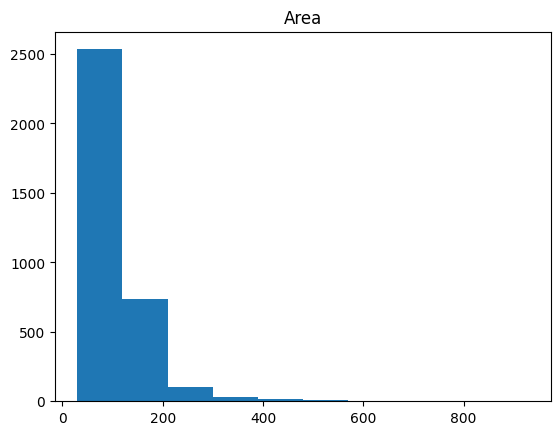

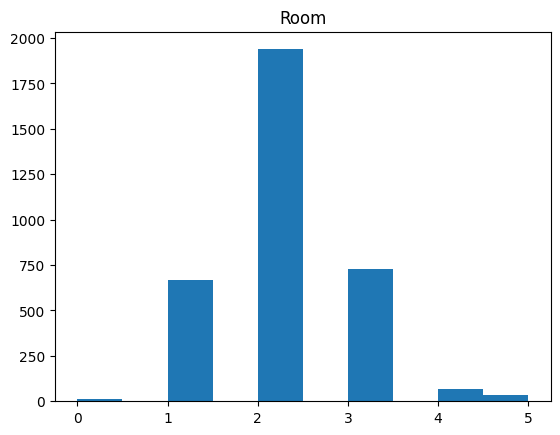

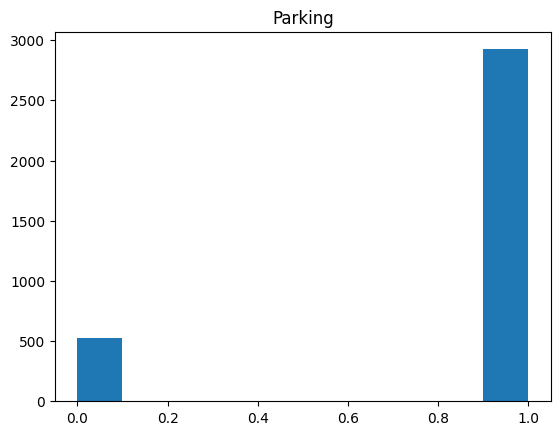

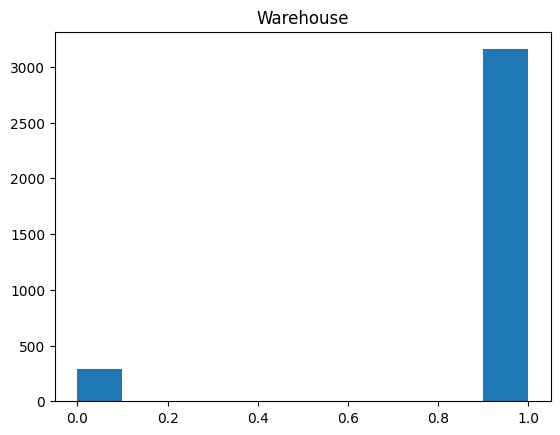

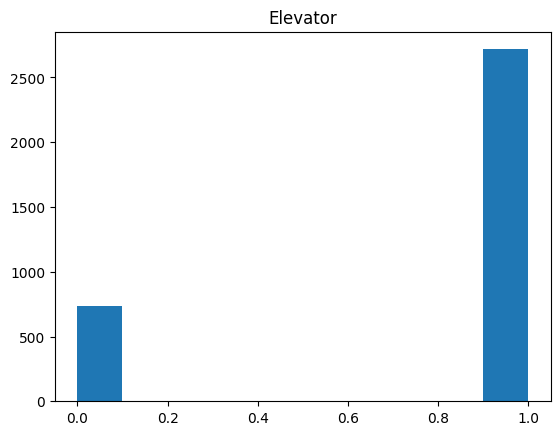

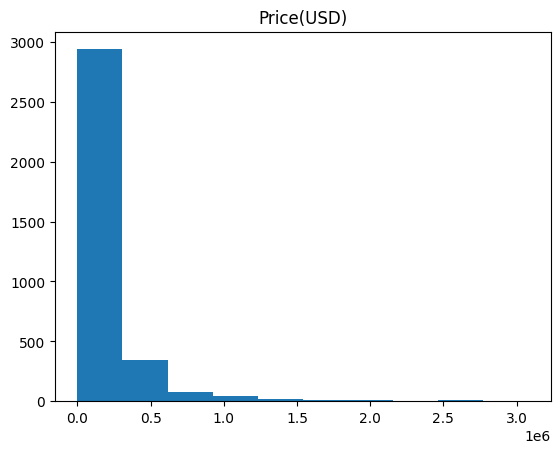

In [17]:
plt.hist(df.Area)  
plt.title("Area")
plt.show()

plt.hist(df.Room)
plt.title("Room")
plt.show()

plt.hist(df.Parking)
plt.title("Parking")
plt.show()

plt.hist(df.Warehouse)   
plt.title("Warehouse")
plt.show()

plt.hist(df.Elevator)
plt.title("Elevator")
plt.show()

plt.hist(df['Price(USD)'])   #, df['Price(USD)']
plt.title("Price(USD)")
plt.show()

In [18]:
cdf = df[['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address','Price(USD)']]
cdf.head(20)

,Area_Normal,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,0.067815,1,1,1,1,0,61666.67
1,0.064586,1,1,1,1,0,61666.67
2,0.085038,2,1,1,1,1,18333.33
3,0.102260,2,1,1,1,2,30083.33
4,0.132400,2,1,1,1,3,233333.33
5,0.075350,2,1,1,0,4,68333.33
6,0.093649,2,1,1,1,1,20000.00
7,0.063509,1,1,1,1,0,71666.67
8,0.058127,2,1,1,0,5,16433.33
9,0.076426,1,1,1,1,6,79000.00


charts

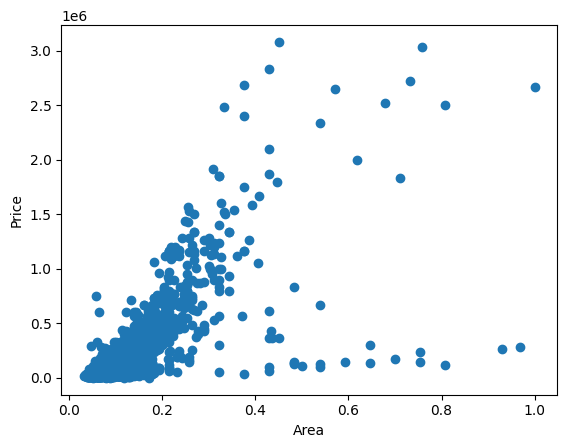

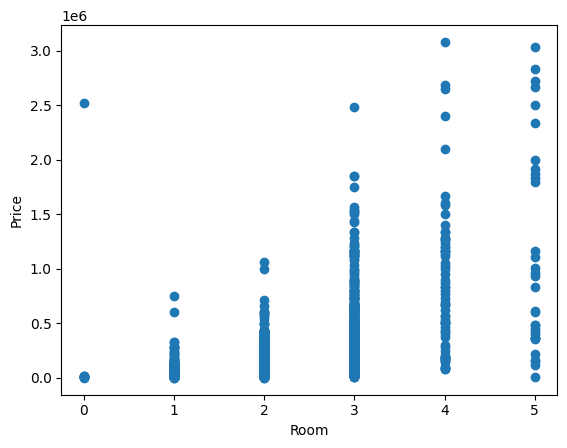

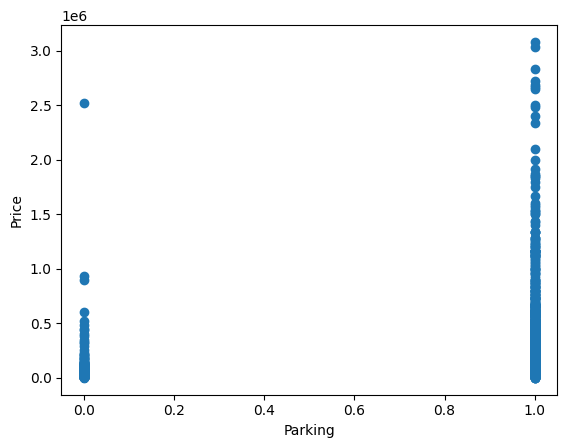

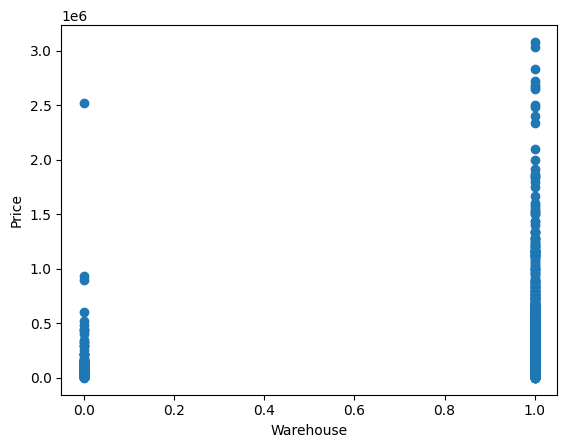

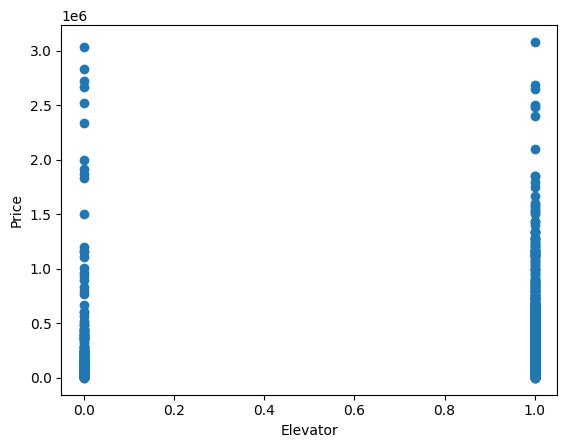

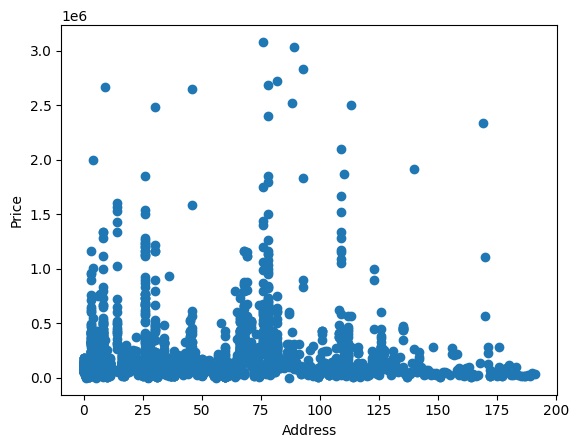

In [19]:
plt.scatter(cdf.Area_Normal, cdf['Price(USD)'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

plt.scatter(cdf.Room, cdf['Price(USD)'])
plt.xlabel("Room")
plt.ylabel('Price')
plt.show()


plt.scatter(cdf.Parking, cdf['Price(USD)'])
plt.xlabel("Parking")
plt.ylabel('Price')
plt.show()

plt.scatter(cdf.Warehouse, cdf['Price(USD)'])
plt.xlabel("Warehouse")
plt.ylabel('Price')
plt.show()

plt.scatter(cdf.Elevator, cdf['Price(USD)'])
plt.xlabel("Elevator")
plt.ylabel('Price')
plt.show()


plt.scatter(cdf.Address, cdf['Price(USD)'])
plt.xlabel("Address")
plt.ylabel('Price')
plt.show()

train and test

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Create Multiple Regression model

train :

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[columns_name].values.reshape(-1, len(columns_name)))
y = np.asanyarray(train['Price(USD)'])
main_model = regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intercept : ', regr.intercept_)

Coefficients:  [ 2.56899543e+06  3.05586657e+04 -9.97723260e+03  4.60567223e+04
  3.62504685e+04  3.34102226e+02]
Intercept :  -255068.94285308354


model:

['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address','Price(USD)']

In [22]:
model = regr.intercept_ + (regr.coef_[0] * cdf['Area_Normal']) + (regr.coef_[1] * cdf['Room']) + (regr.coef_[2] * cdf['Parking']) + (regr.coef_[3] * cdf['Warehouse']) + (regr.coef_[4] * cdf['Elevator']) 
# + (regr.coef_[5] * cdf['Address'])
model

0        22035.732563
1        13739.730112
2        96839.744672
3       141085.091077
4       218514.447286
            ...      
3474    116197.083724
3475    107901.081273
3476     13448.449829
3477    168738.432580
3478    115112.979727
Length: 3450, dtype: float64

predict:

In [23]:
from sklearn.metrics import r2_score

y_hat= regr.predict(test[columns_name])
x = np.asanyarray(test[columns_name])
y = np.asanyarray(test[['Price(USD)']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print(f'r2 score is : {r2_score(y, y_hat)}')

Residual sum of squares: 117024898596.08
Variance score: 0.40
r2 score is : 0.39573543543940015


c:\Users\azizi\Desktop\Programs\machine learning\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


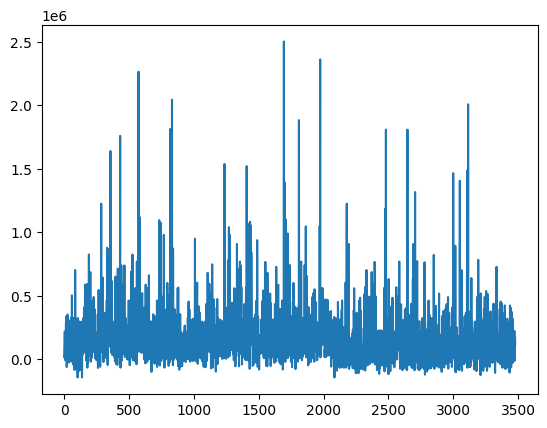

In [24]:
plt.plot(model)